# Exploratory Data Analysis of Terrorism data in African countries

### A growing fraction of the world's civil wars seem to be breaking out on the African continent in the last few decades. Specifically, conflicts in between rebels and the state exerts a major negative impact on the society. Political violence in Africa is a complex subject, thus it will be useful to note a few trends in African terrorism. I examined a longitudinal sample of political violence in African countries between the years 1997-2020 available in Armed Conflict Location and Event Data for the purpose of this analysis.

### The questions explored in this notebook are as follows:
### 1. What are the major rebel groups active in violence and in what forms they perpetrate violence?
### 2. How the temperal dynamics of the forms terrorism changed over the years?
### 3. How the temperal dynamics of the countrywise terrorism and resulted fatalities changed over the years?
### 4. Is there any difference among the forms of terrorist violence in relation to the countrywise incidence of conflicts and fatalities?
### 5. What is geograpghical dynamics of yearly incidence of conflicts in the African continent?

## Import necessary libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import ipywidgets as widgets
import plotly.io as pio
import geopandas as gpd
import plotly

## Read in data

### Convert date column to datatime format

In [48]:
#plotly.offline.init_notebook_mode()

In [49]:
df = pd.read_excel('Terrorism_2.xlsx',header = 0)
df['event_date']=pd.to_datetime(df.event_date)
print(df.head(10))

  event_date                  event_type                 sub_event_type  \
0 1997-01-01  Violence against civilians                         Attack   
1 1997-01-02  Violence against civilians                         Attack   
2 1997-01-03  Violence against civilians                         Attack   
3 1997-01-04  Violence against civilians                         Attack   
4 1997-01-05  Violence against civilians                         Attack   
5 1997-01-06  Violence against civilians                         Attack   
6 1997-01-06                     Battles                    Armed clash   
7 1997-01-07  Explosions/Remote violence  Remote explosive/landmine/IED   
8 1997-01-07                     Battles                    Armed clash   
9 1997-01-07  Violence against civilians                         Attack   

                                   actor1  inter1                    actor2  \
0                GIA: Armed Islamic Group       2       Civilians (Algeria)   
1               

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51988 entries, 0 to 51987
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_date      51988 non-null  datetime64[ns]
 1   event_type      51988 non-null  object        
 2   sub_event_type  51988 non-null  object        
 3   actor1          51988 non-null  object        
 4   inter1          51988 non-null  int64         
 5   actor2          49161 non-null  object        
 6   inter2          51988 non-null  int64         
 7   interaction     51988 non-null  int64         
 8   region          51988 non-null  object        
 9   country         51988 non-null  object        
 10  admin1          51988 non-null  object        
 11  admin2          51988 non-null  object        
 12  admin3          29241 non-null  object        
 13  location        51988 non-null  object        
 14  latitude        51988 non-null  float64       
 15  lo

## Question 1: What are the major rebel groups active in violence and in what forms they perpetrate violence?
### To explore the rebel groups and forms of violence, first we need to dummy code the event_type column and then group the conflicts by the rebel groups and countries.

In [51]:
#grouping rebels in each country and the event type
df['Rebels'] = np.where(df.inter2 == 2, df.actor2, df.actor1)
df['Events'] = 1
countries = sorted(list(set(df.country)))
dff = pd.get_dummies(df, columns=['event_type'], prefix='', prefix_sep='')
dff['event_type'] = df.event_type
rebels = pd.DataFrame(dff.groupby(['country','Rebels'])[['Events','Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians']].sum())
rebels['Percent'] = rebels.Events/rebels.Events.sum()
rebels.to_excel('rebel_groups.xlsx')
rebels = rebels.reset_index()
rebels.to_excel('rebel_groups.xlsx')
print('Total rebel groups is',rebels.shape[0])
print('Total number of events is',df.shape[0])
print('Total number of countries is',len(countries))

Total rebel groups is 558
Total number of events is 51988
Total number of countries is 39


In [52]:
#Analyzing major rebel groups 
rebels_sorted = rebels.sort_values(by=['Events'], ascending=False)
rebels_sorted['cumsum'] = rebels_sorted['Percent'].cumsum()
rebels_50 = rebels_sorted[rebels_sorted['cumsum']<0.5]
rebels_75 = rebels_sorted.loc[rebels_sorted['cumsum']<0.75]
#rebels_75.to_excel('rebel75_groups.xlsx')
rebels_90 = rebels_sorted[rebels_sorted['cumsum']<0.9]
print('50% of the events were caused by',rebels_50.shape[0],'rebel groups in',len(list(set(rebels_50.country))),'countries')
print('75% of the events were caused by',rebels_75.shape[0],'rebel groups in',len(list(set(rebels_75.country))),'countries')
print('90% of the events were caused by',rebels_90.shape[0],'rebel groups in',len(list(set(rebels_90.country))),'countries')

50% of the events were caused by 9 rebel groups in 9 countries
75% of the events were caused by 28 rebel groups in 18 countries
90% of the events were caused by 60 rebel groups in 23 countries


### We can see that 75% of the conflicts were caused by only 28 rebel groups located in 18 countries. Now let's see how the forms of violence are distributed.

In [75]:
print(rebels_75[['country','Rebels','Events']])

                          country  \
376                       Somalia   
22                         Angola   
369                  Sierra Leone   
541                        Uganda   
420                   South Sudan   
341                       Nigeria   
190                         Egypt   
52                       Cameroon   
39                        Burundi   
337                       Nigeria   
133  Democratic Republic of Congo   
149  Democratic Republic of Congo   
48                       Cameroon   
115  Democratic Republic of Congo   
340                       Nigeria   
293                          Mali   
270                         Libya   
218                      Ethiopia   
505                         Sudan   
42                        Burundi   
0                         Algeria   
4                         Algeria   
248                         Kenya   
6                         Algeria   
258                       Liberia   
214                      Ethiopia   
5

Text(0.5, 1.0, '75% of rebel violence in African countries')

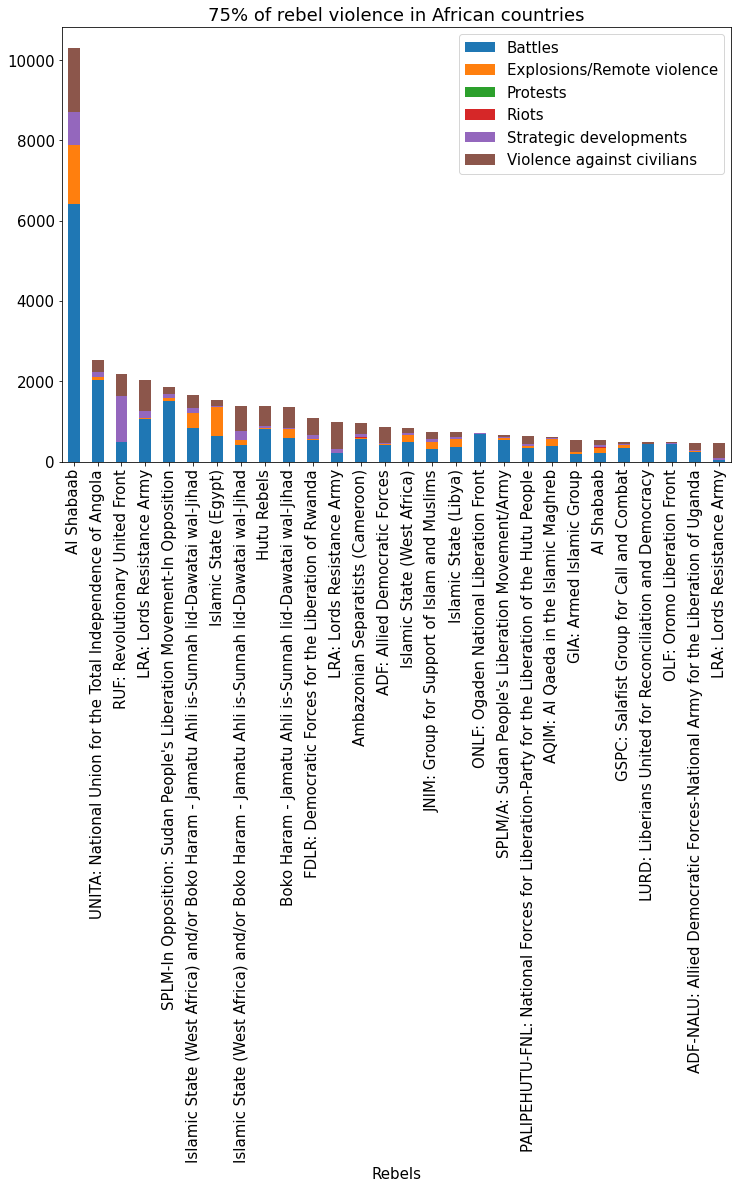

In [53]:
#plotting rebel groups who caused 75% of terrorism in African countries
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 15
bar_data = rebels_75.set_index('Rebels').drop(['country','Percent','cumsum','Events'], axis=1)
bar_data.plot(kind='bar', stacked=True)
plt.title('75% of rebel violence in African countries')

### It is clear that most of the events are battles, violence against civilians, explosions/remote violence and some are strategic developments. There are very few low intensity events such as protests and riots. Furthermore, the rebel group 'Al Shabaab' was responsible for a major fraction of terrorism in the african continent.

## Question 2: How the temperal dynamics of the forms terrorism changed over the years?
### Here, first the conflicts has been grouped by the month and then I create an interactive time series plot to understand the trends.

In [54]:
#Aggregating terrorist event types in months
eventType_ts = dff.groupby(pd.Grouper(key='event_date', axis=0,freq='M'))[['Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians']].sum()
print(eventType_ts)

            Battles  Explosions/Remote violence  Protests  Riots  \
event_date                                                         
1997-01-31     67.0                        12.0       0.0    0.0   
1997-02-28     21.0                         0.0       0.0    0.0   
1997-03-31     71.0                         2.0       0.0    0.0   
1997-04-30     50.0                         4.0       0.0    1.0   
1997-05-31     62.0                         0.0       1.0    0.0   
...             ...                         ...       ...    ...   
2020-10-31    210.0                        55.0       0.0    0.0   
2020-11-30    214.0                        74.0       0.0    1.0   
2020-12-31    244.0                        60.0       0.0    2.0   
2021-01-31    222.0                       116.0       0.0    3.0   
2021-02-28    208.0                        49.0       0.0    0.0   

            Strategic developments  Violence against civilians  
event_date                                        

In [55]:
fig = go.Figure()

for column in eventType_ts.columns.to_list():
    fig.add_trace(go.Scatter(x = eventType_ts.index, y = eventType_ts[column], name = column))
    
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(buttons=list([
                dict(count=5,
                     label="5 years",
                     step="year",
                     stepmode="backward"),
                dict(count=10,
                     label="10 years",
                     step="year",
                     stepmode="backward"),
                dict(step="all")])),
        rangeslider=dict(
            visible=True),
        type="date"))

fig.update_layout(
    title='Monthly incidence of terrorist event types in African countries from 1997-2021',
    xaxis_title='Date',
    yaxis_title='Monthly incidence'
)

fig.show()
fig.write_html("testfile.html")

#pio.write_html(fig, file='tsplot.html', auto_open=True)


### We can see that, all forms of terrorist events has an escalating trend over the past decade. In addition, rebels seem to perpetrate battles and violence against civilians more than the other forms of violence. Very few protest and riots organized by rebel groups.

## Question 3: How the temperal dynamics of the countrywise terrorism and resulted fatalities changed over the years?
### Here, I use two methods to clearly understand the patterns. First, I create interactive time series plots to compare the countrywise conflicts and fatalities. Since, the count of fatalities is much higher than the count of conflicts, secondly, I create separate plots for conflicts and fatalities which enables the comparison of countrywise trends.

In [56]:
#Aggregating monthly number of events and fatalities by country (Mtd I)
events_ts = dff.groupby(['country',pd.Grouper(key='event_date', axis=0,freq='M')])[['Events','fatalities']].sum(numeric_only=True)
events_ts = events_ts.reset_index(level='country')
print(events_ts)

            country  Events  fatalities
event_date                             
1997-01-31  Algeria      42         465
1997-02-28  Algeria       8         145
1997-04-30  Algeria      11         415
1997-05-31  Algeria       4          64
1997-06-30  Algeria       6         123
...             ...     ...         ...
2000-01-31   Zambia       1           0
2000-03-31   Zambia       1           0
2000-04-30   Zambia       1           0
2000-09-30   Zambia       1           0
2002-04-30   Zambia       1           0

[3489 rows x 3 columns]


In [57]:
def plots_events(Country='Algeria'):
    frame = pd.DataFrame(events_ts[events_ts.country==Country])
    fig = go.Figure()

    for column in frame[['Events','fatalities']].columns.to_list():
        fig.add_trace(go.Scatter(x = frame.index, y = frame[column], name = column))

    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(buttons=list([
                    dict(count=5,
                         label="5 years",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10 years",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")])),
            rangeslider=dict(visible=True),
            type="date"))

    fig.update_layout(
        title='Monthly incidence of terrorist events and fatalities from 1997-2021 in ' + Country,
        xaxis_title='Date',
        yaxis_title='Value')

    fig.show()

In [58]:
widgets.interact(plots_events, Country=countries)

interactive(children=(Dropdown(description='Country', options=('Algeria', 'Angola', 'Burkina Faso', 'Burundi',…

<function __main__.plots_events(Country='Algeria')>

In [59]:
#Aggregating monthly counts for countrywise number of events and fatalities (Mtd II)
all_days = pd.date_range(df.event_date.min(), df.event_date.max(), freq ='D')
all_months = pd.date_range(df.event_date.min(), '2021-03-26', freq ='M')
Category1 = pd.DataFrame({'Date' : all_months, 'Category' : np.repeat('Events',len(all_months))})
Category2 = pd.DataFrame({'Date' : all_months, 'Category' : np.repeat('Fatalities',len(all_months))})
ind_final = pd.concat([Category1,Category2], axis=0, ignore_index=True)
for country in countries:
    individual = df[df.country==country][['event_date','Events','fatalities']]
    individual = individual.groupby(pd.Grouper(key='event_date', axis=0,freq='D'))[['Events','fatalities']].sum()
    individual = individual.reindex(all_days,fill_value=0)
    individual = individual.reset_index()
    individual = individual.groupby(pd.Grouper(key='index', axis=0,freq='M'))[['Events','fatalities']].sum()
    Values = pd.concat([individual.Events,individual.fatalities], axis=0, ignore_index=True)
    ind_final = pd.concat([ind_final,Values.rename(country)], axis=1)
print(ind_final)

          Date    Category  Algeria  Angola  Burkina Faso  Burundi  Cameroon  \
0   1997-01-31      Events       42       3             0       14         0   
1   1997-02-28      Events        8      10             0        3         0   
2   1997-03-31      Events        0       4             0       10         0   
3   1997-04-30      Events       11       3             0       12         0   
4   1997-05-31      Events        4      16             0       14         0   
..         ...         ...      ...     ...           ...      ...       ...   
575 2020-10-31  Fatalities        0       0           106        0        64   
576 2020-11-30  Fatalities        0       0            55        0        52   
577 2020-12-31  Fatalities        4       0            18        0        42   
578 2021-01-31  Fatalities        9       0            62        0        54   
579 2021-02-28  Fatalities        0       0            64        0        55   

     Central African Republic  Chad  De

In [60]:
def plots_individual(Category='Events'):
    frame = pd.DataFrame(ind_final[ind_final.Category==Category])
    fig = go.Figure()

    for column in frame.drop(['Date','Category'],axis=1).columns.to_list():
        fig.add_trace(go.Scatter(x = frame.Date, y = frame[column], name = column))

    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(buttons=list([
                    dict(count=5,
                         label="5 years",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10 years",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")])),
            rangeslider=dict(visible=True),
            type="date"))

    fig.update_layout(
        title='Monthly incidence of terrorist events and fatalities from 1997-2021 in ',
        xaxis_title='Date',
        yaxis_title='Value')

    fig.show()

In [61]:
widgets.interact(plots_individual, Category=['Events','Fatalities'])

interactive(children=(Dropdown(description='Category', options=('Events', 'Fatalities'), value='Events'), Outp…

<function __main__.plots_individual(Category='Events')>

### The above plots depicts that Angola, Burundi, Democratic Republic of Congo, Sierra Leone, Somalia and Uganda have some peaks of incidence of terrorist conflicts. Furthermore, Algeria, Angola, Burundi, Democratic Republic of Congo, Ethiopia, Guinea, Libya, Nigeria and Sudan have some peaks of fatalities.

## Question 4: Is there any difference among the forms of terrorist violence in relation to the countrywise incidence of conflicts and fatalities?
### Here, I first create two data frames for the incidence of different forms of conflicts and the resulted fatalities grouped by month and country.

In [62]:
# Creating the dataframe for the incidence of conflicts
eventTypes = sorted(list(set(dff.event_type)))
all_months = pd.date_range(df.event_date.min(), '2021-03-26', freq ='M')
Event_final = pd.DataFrame()
Event_times = dff.groupby(['country',pd.Grouper(key='event_date', axis=0,freq='M')])[['Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians']].sum(numeric_only=True)
Event_times = Event_times.reset_index(level='country')
for country in countries:
    individual = Event_times[Event_times.country==country].drop('country', axis=1)
    individual = individual.reindex(all_months,fill_value=0)
    individual['Country'] = np.repeat(country,len(all_months))
    Event_final = pd.concat([Event_final,individual], axis=0)
Event_final['Category'] = np.repeat('Events',Event_final.shape[0])
print(Event_final)

            Battles  Explosions/Remote violence  Protests  Riots  \
1997-01-31        8                          11         0      0   
1997-02-28        0                           0         0      0   
1997-03-31        0                           0         0      0   
1997-04-30        0                           2         0      0   
1997-05-31        0                           0         0      0   
...             ...                         ...       ...    ...   
2020-10-31        0                           0         0      0   
2020-11-30        0                           0         0      0   
2020-12-31        0                           0         0      0   
2021-01-31        0                           0         0      0   
2021-02-28        0                           0         0      0   

            Strategic developments  Violence against civilians  Country  \
1997-01-31                       0                          23  Algeria   
1997-02-28                       

In [63]:
# Creating the dataframe for the fatalities
fat_df = dff[['event_date','country','event_type','Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians','fatalities']]
cat_frame = pd.DataFrame()
for cat in eventTypes:
    type_frame = fat_df[fat_df.event_type == cat].reset_index(drop=True)
    type_frame[cat] = type_frame['fatalities']
    cat_frame = pd.concat([cat_frame,type_frame], axis=0)
cat_frame = cat_frame.groupby(['country',pd.Grouper(key='event_date', axis=0,freq='M')])[['Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians']].sum(numeric_only=True)
cat_frame = cat_frame.reset_index(level='country')
fatality_final = pd.DataFrame()
for country in countries:
    individual = cat_frame[cat_frame.country==country].drop('country', axis=1)
    individual = individual.reindex(all_months,fill_value=0)
    individual['Country'] = np.repeat(country,len(all_months))
    fatality_final = pd.concat([fatality_final,individual], axis=0)
fatality_final['Category'] = np.repeat('Fatalities',fatality_final.shape[0])

In [64]:
event_fat = pd.concat([Event_final,fatality_final], axis=0)

In [65]:
def plot_event_fat(Country='Algeria',Category='Events'):
    frame = pd.DataFrame(event_fat[(event_fat.Country==Country) & (event_fat.Category==Category)])
    fig = go.Figure()

    for column in frame.drop(['Country','Category'],axis=1).columns.to_list():
        fig.add_trace(go.Scatter(x = frame.index, y = frame[column], name = column))

    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(buttons=list([
                    dict(count=5,
                         label="5 years",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10 years",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")])),
            rangeslider=dict(visible=True),
            type="date"))

    fig.update_layout(
        title='Monthly incidence of terrorist events and fatalities from 1997-2021 in ' + Country,
        xaxis_title='Date',
        yaxis_title='Value')

    fig.show()

In [66]:
widgets.interact(plot_event_fat, Country=countries,Category=['Events','Fatalities'])


interactive(children=(Dropdown(description='Country', options=('Algeria', 'Angola', 'Burkina Faso', 'Burundi',…

<function __main__.plot_event_fat(Country='Algeria', Category='Events')>

### It is clear that in most countries, high incidence of conflicts were in the form of battles and violence against civilians which caused high fatality rates.

## Question 5: What is geograpghical dynamics of yearly incidence of conflicts in the African continent?

In [68]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world.query('continent == "Africa"')
africa = africa.sort_values('name')
africa = africa.reset_index(drop=True)
year_df = df[['country','year','Events']]
year_df = pd.DataFrame(year_df.groupby(['country','year']).sum())
africa_names = africa['name']
diff_names = ['Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Eq. Guinea', 'S. Sudan']
df_names = ['Central African Republic', 'Republic of Congo', 'Ivory Coast', 'Democratic Republic of Congo', 'Equatorial Guinea', 'South Sudan']
name_index = africa[africa['name'].isin(diff_names)].index.tolist()
africa.loc[name_index,'name'] = df_names
mux = pd.MultiIndex.from_product([africa['name'],range(1997,2022)], names=['country', 'year'])
year_df = year_df.reindex(mux)
year_df = year_df.reset_index()
year_df = year_df.fillna(0)
print(year_df)

#print(sorted(list(set(year_df.country))))


       country  year  Events
0      Algeria  1997   141.0
1      Algeria  1998    47.0
2      Algeria  1999    50.0
3      Algeria  2000   158.0
4      Algeria  2001   126.0
...        ...   ...     ...
1270  eSwatini  2017     0.0
1271  eSwatini  2018     0.0
1272  eSwatini  2019     0.0
1273  eSwatini  2020     0.0
1274  eSwatini  2021     0.0

[1275 rows x 3 columns]


In [69]:
def year_map(Year=1997):
    YEAR = year_df[year_df['year']==Year]
    YEAR = YEAR.reset_index(drop=True)
    africa['Events'] = np.log(YEAR.Events+1)
    plt.rcParams['figure.figsize'] = (12,12)
    plt.rcParams['font.size'] = 15
    ax = africa.plot(column="Events",legend=True,cmap='turbo',vmin=0,vmax=7.3)
    fig = ax.figure
    #fig.axes[1].tick_params(labelsize=20)
    #fig.axes[1].set_title('legend')
    fig.axes[0].xaxis.set_visible(False)
    fig.axes[0].yaxis.set_visible(False)
    fig.axes[1].set_yticks(range(8),minor=False)
    fig.axes[1].set_yticklabels(np.round(np.exp(range(8))-1).astype(int), fontdict=None, minor=False)
    plt.title('Incidence of political violence events in African countries')
    plt.show()

In [70]:
widgets.interact(year_map, Year=range(1997,2022))

interactive(children=(Dropdown(description='Year', options=(1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 20…

<function __main__.year_map(Year=1997)>

### From the above interactive map of the African continent, we can see a clear geographical diffusion of terrorism to the neighboring countries and an escalation of terrorist events over the past few years.